In [1]:
from utils import Ball, Agent, Environment

ball = Ball(10, 0)
agent1 = Agent(-5, ball, 1, damping=1)
agent2 = Agent(20, ball, 1, damping=1)

desired_trajectory = [0] * 100

env = Environment(ball, desired_trajectory, agent1, agent2, debug=False)
print(env)
(a1_obs, a2_obs), reward, done = env.reset()

position = []
while not done:
    position.append(a2_obs[1])
    (a1_obs, a2_obs), reward, done = env.step([0, 0])

pygame 2.1.0 (SDL 2.0.16, Python 3.9.13)
Hello from the pygame community. https://www.pygame.org/contribute.html
<Environment instance>


C:\Users\yashs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


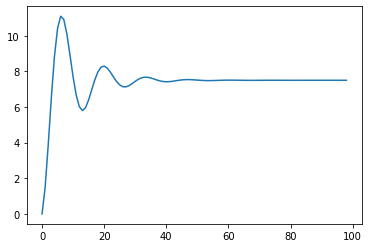

: 

In [2]:
import matplotlib.pyplot as plt

plt.plot(range(len(position)), position)

In [1]:
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import gym

class QNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.q_network = QNetwork(state_size, action_size)
        self.target_network = QNetwork(state_size, action_size)
        self.target_network.load_state_dict(self.q_network.state_dict())
        self.target_network.eval()
        self.optimizer = optim.Adam(self.q_network.parameters(), lr=0.001)
        self.memory = []
        self.batch_size = 64
        self.gamma = 0.99
        self.epsilon = 1.0
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.01
        self.rewards = []

    def select_action(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.rand(2)
        else:
            with torch.no_grad():
                state = torch.FloatTensor(state)
                q_values = self.q_network(state)
                return q_values.detach().numpy()

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def replay(self):
        if len(self.memory) < self.batch_size:
            return

        batch = random.sample(self.memory, self.batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        states = torch.FloatTensor(states)
        actions = torch.FloatTensor(actions)
        rewards = torch.FloatTensor(rewards)
        next_states = torch.FloatTensor(next_states)
        dones = torch.BoolTensor(dones)

        q_values = self.q_network(states)
        next_q_values = self.target_network(next_states)

        target_q_values = q_values.clone()
        for i in range(self.batch_size):
            if dones[i]:
                target_q_values[i] = rewards[i]
            else:
                target_q_values[i] = rewards[i] + self.gamma * next_q_values[i]

        loss = nn.MSELoss()
        loss_value = loss(q_values, target_q_values)

        self.optimizer.zero_grad()
        loss_value.backward()
        self.optimizer.step()

        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

    def update_target_network(self):
        self.target_network.load_state_dict(self.q_network.state_dict())

    def train(self, episodes):
        for episode in range(episodes):
            (state, _), reward, done = env.reset()
            total_reward = reward

            while not done:
                action = self.select_action(state)
                (next_state, _), reward, done = env.step(action)
                self.remember(state, action, reward, next_state, done)
                state = next_state
                total_reward += reward

            self.replay()
            self.update_target_network()

            self.rewards.append(total_reward)

In [6]:
from utils import Ball, Agent, Environment

ball = Ball(10, 0)
agent1 = Agent(-5, ball, 1, damping=1)
agent2 = Agent(20, ball, 1, damping=1)

desired_trajectory = [0] * 25 + [1] * 25 + [2] * 25 + [1] * 25

env = Environment(ball, desired_trajectory, agent1, agent2, debug=False)

state_size = env.observation_space.shape[0]
action_size = 2  # Custom action space with two floats

agent = DQNAgent(state_size, action_size)
agent.train(episodes=100)

env.close()

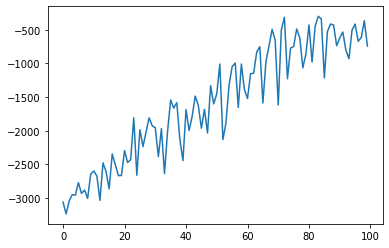

In [7]:
import matplotlib.pyplot as plt

plt.plot(range(len(agent.rewards)), agent.rewards)

In [ ]:
from utils import Ball, Agent, Environment

ball = Ball(10, 0)
agent1 = Agent(-5, ball, 1, damping=1)
agent2 = Agent(20, ball, 1, damping=1)

desired_trajectory = [0] * 100

env = Environment(ball, desired_trajectory, agent1, agent2, debug=True)
print(env)
(a1_obs, a2_obs), reward, done = env.reset()

position = []
while not done:
    position.append(a2_obs[1])
    env.render()
    (a1_obs, a2_obs), reward, done = env.step(env.action_space.sample())

pygame 2.1.0 (SDL 2.0.16, Python 3.9.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


C:\Users\yashs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


<Environment instance>


KeyboardInterrupt: 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  

: 